In [1]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import urllib
import netCDF4
from mpl_toolkits.basemap import Basemap
import sys


In [2]:
from dem import readem

In [3]:
%matplotlib notebook

In [5]:
def pltm(minlat,maxlat,minlon,maxlon,lons,lats,topo,title=None):

# Create map
 m = Basemap(projection='cyl', llcrnrlat=minlat,urcrnrlat=maxlat,llcrnrlon=minlon, urcrnrlon=maxlon,resolution='l')
 fig = plt.figure(figsize=(10,8))
 cs = m.contourf(lons,lats,topo,cmap=plt.cm.jet)
 m.drawcoastlines()
 m.drawmapboundary()
 plt.title(title)
 cbar = plt.colorbar(orientation='horizontal', extend='both')
 cbar.ax.set_xlabel('meters')

# Save figure (without 'white' borders)
#plt.savefig('topo.png', bbox_inches='tight')
 plt.show()


Define map window

In [4]:
minlat = 28.5
maxlat = 47.5
minlon = -5.5
maxlon = 43.
isub=2


### Remote data

In [ ]:
# Read data from: http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.html
# using the netCDF output option
 
base_url='http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.nc?'
query='topo[(%f):%d:(%f)][(%f):%d:(%f)]' % (maxlat,isub,minlat,minlon,isub,maxlon)
url = base_url+query
print url


In [ ]:
# store data in NetCDF file
file='tmp/usgsCeSrtm30v6.nc'
urllib.urlretrieve (url, file)



In [ ]:
# open NetCDF data in
nc = netCDF4.Dataset(file)
ncv = nc.variables
print ncv.keys()

lon = ncv['longitude'][:]
lat = ncv['latitude'][:]
lons, lats = np.meshgrid(lon,lat)
topo = ncv['topo'][:,:]


In [ ]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,lons,lats,topo,title='SRTM30 - downloaded')

## LOCAL DATA

In [6]:
pathb='/DATA/critechuser/REPOS/StormS/BATHYMETRY/GLOBAL/'

In [7]:
boption={'srtm30' : 'topo30.grd', 'gebco08_deltares' : 'gebco30_DELTARES.nc', 'gebco2014' : 'GEBCO_2014_2D.nc', 'gebco08_hyflux' : 'gebco30.nc' }

###  SMTR30

In [ ]:
m1,m2,bg = readem(float(minlat),float(maxlat),float(minlon),float(maxlon),pathb+boption['srtm30'])

In [ ]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,m1,m2,bg,title='SRTM30 - local')

### Gebco08 deltares 

This is the gebco files downloaded from url='http://opendap.deltares.nl/thredds/dodsC/opendap/deltares/delftdashboard/bathymetry/gebco_08/zl01/catalog.html'.
These files where merged together in one file with the script merge.sh in ...BATHYMETRY/gebco08. 

In [8]:
g1,g2,gg = readem(float(minlat),float(maxlat),float(minlon),float(maxlon),pathb+boption['gebco08_deltares'])

In [ ]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,m1,m2,bg,title='Gebco08 - deltares')

### Gebco08 Hyflux 

This is the modified gebco08 bathymetry that hyflux is using 

In [15]:
h1,h2,hg = readem(float(minlat),float(maxlat),float(minlon),float(maxlon),pathb+boption['gebco08_hyflux'])

In [ ]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,h1,h2,hg,title='Gebco08 - Hyflux')

### Gebco2014

This is the 2014 gebco 30 arc seconds downloaded from https://www.bodc.ac.uk/data/online_delivery/gebco/.

In [9]:
s1,s2,sg = readem(float(minlat),float(maxlat),float(minlon),float(maxlon),pathb+boption['gebco2014'])

In [ ]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,s1,s2,sg,title='Gebco2014')

## COMPARE VALUES

In [24]:
dp=sg-gg

In [25]:
# mask the zero values
dp=np.ma.masked_where(dp==0,dp)

<IPython.core.display.Javascript object>


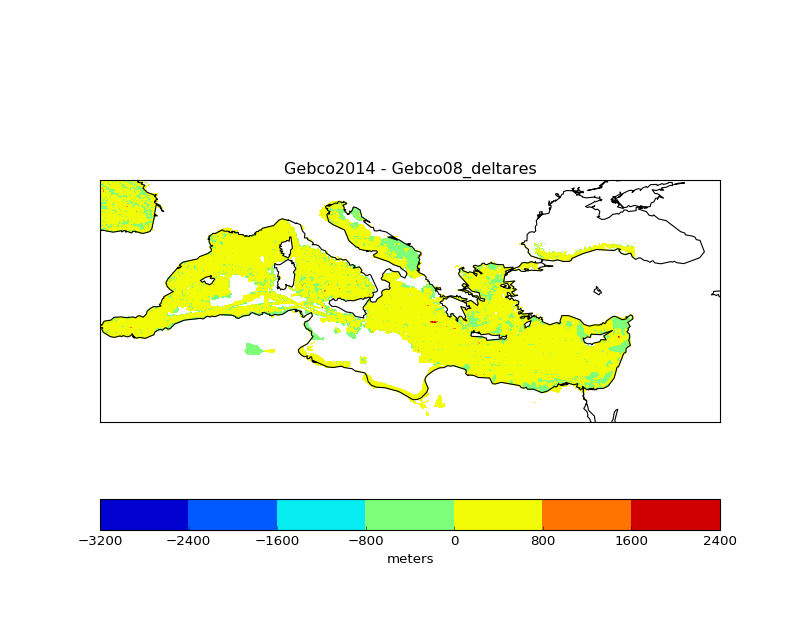

In [26]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,s1,s2,dp,title='Gebco2014 - Gebco08_deltares')